In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropConstantFeatures

In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-30,4422.439941,4458.479980,4422.439941,4450.379883,4450.379883,3923450000
1,2023-06-29,4374.939941,4398.390137,4371.970215,4396.439941,4396.439941,3696660000
2,2023-06-28,4367.479980,4390.350098,4360.220215,4376.859863,4376.859863,3739330000
3,2023-06-27,4337.359863,4384.419922,4335.000000,4378.410156,4378.410156,3573500000
4,2023-06-26,4344.839844,4362.060059,4328.080078,4328.819824,4328.819824,3415030000


In [3]:
constant_features = DropConstantFeatures(tol=0.998)
df = constant_features.fit_transform(df)

In [4]:
corr_matrix = df.corr()['Close'].sort_values()
corr_matrix

Volume       0.291799
Date         0.958780
Open         0.999653
High         0.999812
Low          0.999834
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

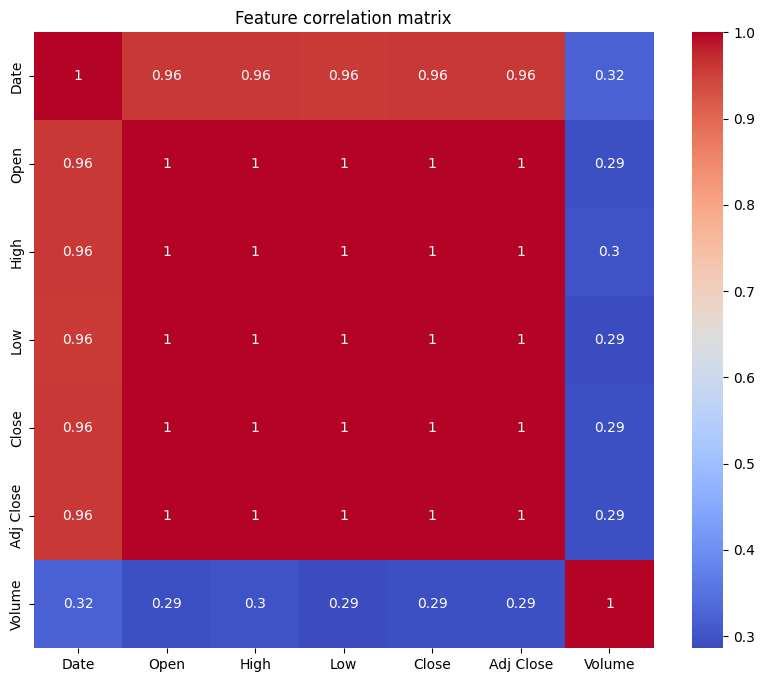

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature correlation matrix')
plt.show()